# Fake News Detection
`Author` [Muhammad Abdullah](https://www.kaggle.com/abdullahlmao)\
`Date` 2022-01-01\
`Dataset` [Kaggle](https://www.kaggle.com/datasets/rajatkumar30/fake-news)

Fake news or hoax news is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue.

This dataset is having Both Fake and Real news.

The columns present in the dataset are:-

1) `Title` -> Title of the News

2) `Text` -> Text or Content of the News

3) `Label` -> Labelling the news as Fake or Real

In [60]:
# Step1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string
from sklearn.feature_extraction import text

In [61]:
# Step2: Load the dataset
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [62]:
df['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [63]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [64]:
def preprocessing_text(text):

    #Convert to lowercase
    text = text.lower()

    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

In [65]:
df['text'] = df['text'].apply(preprocessing_text)

In [66]:
stop_words = text.ENGLISH_STOP_WORDS

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'])

In [68]:
# Enocde labels: 1 = Real, 0= Fake
y = df['label'].apply(lambda x:0 if x == 'FAKE' else 1)

In [69]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Model building - PassiveAgressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [71]:
# Prediction and evaluation
y_pred = pac.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score * 100: .2f}%")

Accuracy Score:  94.48%


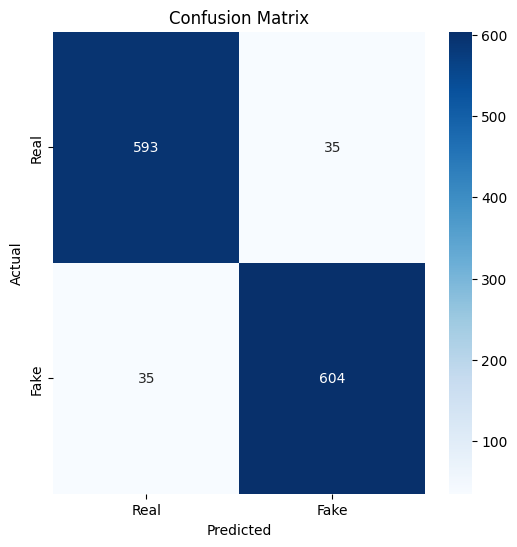

In [72]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
def predict_news(news):
    news = preprocessing_text(news)
    news_vectorized = tfidf_vectorizer.transform([news])
    prediction = pac.predict(news_vectorized)
    # return prediction
    return 'FAKE' if prediction[0] == 0 else 'REAL'
# Test the function
print(predict_news(news = "NASA's Perseverance Rover Successfully Collects Mars Rock Samples for Return to Earth.."))


FAKE


In [74]:
def predict_news(news):
    news = preprocessing_text(news)
    news_vectorized = tfidf_vectorizer.transform([news])
    prediction = pac.predict(news_vectorized)
    # return prediction
    return 'FAKE' if prediction[0] == 0 else 'REAL'
# Test the function
print(predict_news(news = "Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under consideration to lead the department. ."))


REAL


In [75]:
def predict_news(news):
    news = preprocessing_text(news)
    news_vectorized = tfidf_vectorizer.transform([news])
    prediction = pac.predict(news_vectorized)
    # return prediction
    return 'FAKE' if prediction[0] == 0 else 'REAL'
# Test the function
print(predict_news(news = "U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism."))


REAL
